In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Load dataset directly from GitHub
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Display first few rows
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#EXPLORE THE DATA
# Shape of dataset
print("Shape of dataset:", data.shape)

# Information about columns
data.info()

# Check for missing values
data.isnull().sum()


Shape of dataset: (891, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [4]:
# DATA CLEANING AND PRE-PROCESSING
# Fill missing values in 'Age' with median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with most frequent value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' due to too many missing values
data.drop(columns=['Cabin'], inplace=True)

# Drop unnecessary columns that are not useful for prediction
data.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Verify no missing values remain
data.isnull().sum()


/tmp/ipython-input-3149278867.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/tmp/ipython-input-3149278867.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [6]:
#Encode categorical variables
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

# Display processed data
data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [7]:
# Independent features
X = data.drop(columns=['Survived'])

# Dependent feature
y = data['Survived']

print("Feature columns:", X.columns.tolist())


Feature columns: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)


In [13]:
# Create logistic regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

Model Accuracy: 81.01 %



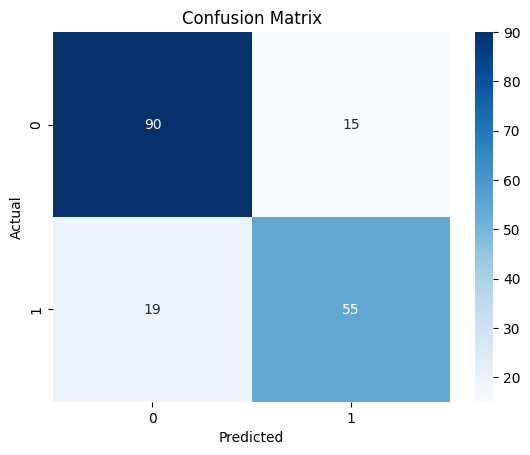

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [14]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy*100, 2), "%\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


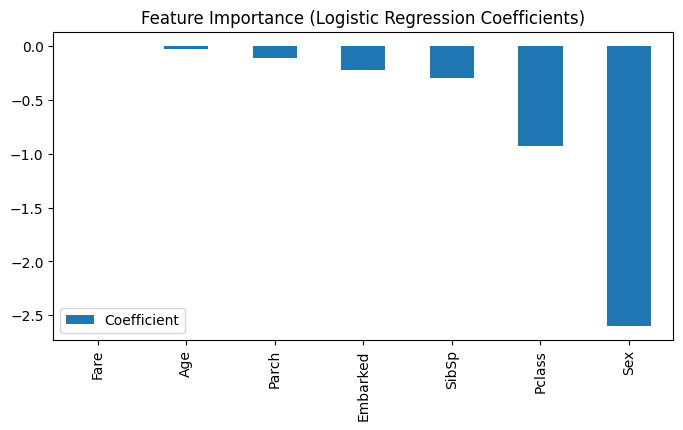

In [15]:
# Check model coefficients
coefficients = pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False).plot(kind='bar', figsize=(8,4))
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()


In [16]:
print("✅ SUMMARY:")
print(f"The logistic regression model achieved an accuracy of {round(accuracy*100,2)}%.")
print("""
Observations:
- Female passengers had a higher chance of survival.
- Passengers in higher classes (1st class) survived more often than those in 3rd class.
- Younger passengers had slightly better survival rates.
- Fare and class are significant predictors of survival.
""")


✅ SUMMARY:
The logistic regression model achieved an accuracy of 81.01%.

Observations:
- Female passengers had a higher chance of survival.
- Passengers in higher classes (1st class) survived more often than those in 3rd class.
- Younger passengers had slightly better survival rates.
- Fare and class are significant predictors of survival.



In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", round(rf_acc*100, 2), "%")


Random Forest Accuracy: 82.12 %
